In [2]:
import pandas as pd
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier,plot_tree
# 画图工具库
import matplotlib.pyplot as plt
#新的库: LabelEncoder 将文本变成数字
from sklearn.preprocessing import LabelEncoder

In [3]:
#构建简单的数据集
data={
    '有房子':['是','是','否','否'],
    '有工作':['是','否','是','否'],
    '贷款批准':['批准','批准','批准','拒绝'],
}
df = pd.DataFrame(data)
df

,有房子,有工作,贷款批准
0,是,是,批准
1,是,否,批准
2,否,是,批准
3,否,否,拒绝


In [4]:
#LabelEncoder 将类别特征转换为数值
# LabelEncoder 一次只能处理一列
lable_encoder = LabelEncoder()
df['有房子'] = lable_encoder.fit_transform(df['有房子'])
df['有工作'] = lable_encoder.fit_transform(df['有工作'])
df

,有房子,有工作,贷款批准
0,1,1,批准
1,1,0,批准
2,0,1,批准
3,0,0,拒绝


In [5]:
#手动
df['贷款批准'] = df['贷款批准'].map({'批准':1,'拒绝':0})
df

,有房子,有工作,贷款批准
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [6]:
#分离特征和标签
X = df[['有房子','有工作']]
y = df['贷款批准']

In [7]:
# 直接构建 决策树模型 进行训练
model = DecisionTreeClassifier()
model.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6, 0.8333333333333334, '有房子 <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 批准'),
 Text(0.4, 0.5, '有工作 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 拒绝'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 拒绝'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 批准'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 批准'),
 Text(0.7, 0.6666666666666667, '  False')]

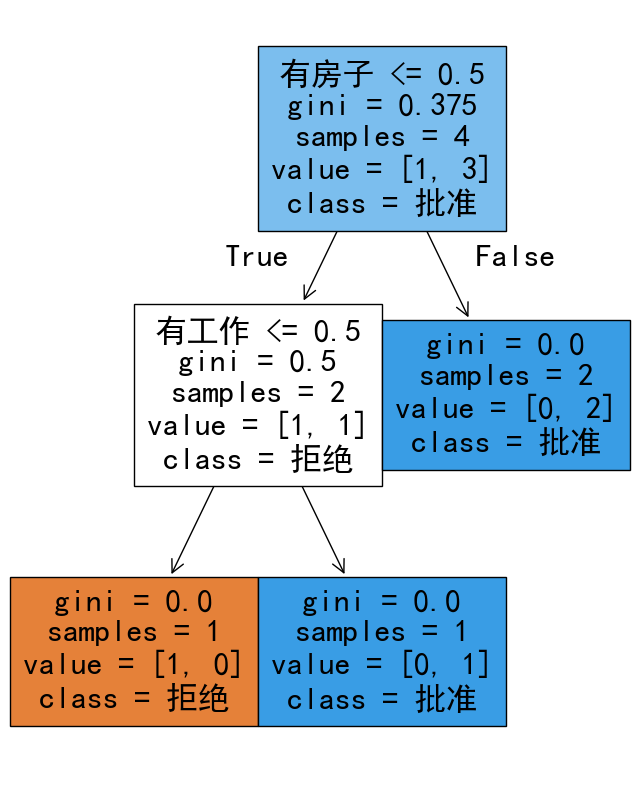

In [8]:
#可视化决策树
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签"
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号"
plt.figure(figsize=(8,10))
# filled 有颜色的填充
# feature_names列表的顺序重要吗 非常重要 按照训练的时候的顺序 保持一致
# class_names 列表的顺序 怎么看？    如果你的0表示拒绝 1表示批准 那么就要写['拒绝','批准']
plot_tree(model,filled=True,feature_names=['有房子','有工作'],class_names=['拒绝','批准'])

In [11]:
#预测一个新客户
sample = pd.DataFrame(
    {
        '有房子':[1],
        '有工作':[1]
    }
)
pre = model.predict(sample)
pre

array([1], dtype=int64)

In [12]:
if pre[0]==1:
    print('批准')
else:
    print('拒绝')

批准


In [13]:
#增加数据量
data={
        "有房子":["否","否","否","是","否","否","否","是","是","是","是","是","否","否","否"],
    "有工作":["否","否","是","是","否","否","否","是","否","否","否","否","是","是","否"],
    "信誉":["一般","好","好","一般","一般","一般","好","好","非常好","非常好","非常好","好","好","非常好","一般"],
    "贷款批准":["拒绝","拒绝","批准","批准","拒绝","拒绝","拒绝","批准","批准","批准","批准","批准","批准","批准","拒绝"]
}
df = pd.DataFrame(data)
df
    

,有房子,有工作,信誉,贷款批准
0,否,否,一般,拒绝
1,否,否,好,拒绝
2,否,是,好,批准
3,是,是,一般,批准
4,否,否,一般,拒绝
5,否,否,一般,拒绝
6,否,否,好,拒绝
7,是,是,好,批准
8,是,否,非常好,批准
9,是,否,非常好,批准


In [18]:
#将类别数据转换为数值数据
Label_encoder = LabelEncoder()
df['有房子'] = Label_encoder.fit_transform(df['有房子'])
df['有工作'] = Label_encoder.fit_transform(df['有工作'])
df['信誉'] = Label_encoder.fit_transform(df['信誉'])
df

,有房子,有工作,信誉,贷款批准
0,0,0,0,拒绝
1,0,0,1,拒绝
2,0,1,1,批准
3,1,1,0,批准
4,0,0,0,拒绝
5,0,0,0,拒绝
6,0,0,1,拒绝
7,1,1,1,批准
8,1,0,2,批准
9,1,0,2,批准


In [19]:
X = df[['有房子','有工作','信誉']]
y = df['贷款批准'].map({'拒绝':0,'批准':1})

In [20]:
#构建决策树
model = DecisionTreeClassifier()
model.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6, 0.8333333333333334, '有房子 <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]\nclass = 批准'),
 Text(0.4, 0.5, '有工作 <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = 拒绝'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 拒绝'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 批准'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 批准'),
 Text(0.7, 0.6666666666666667, '  False')]

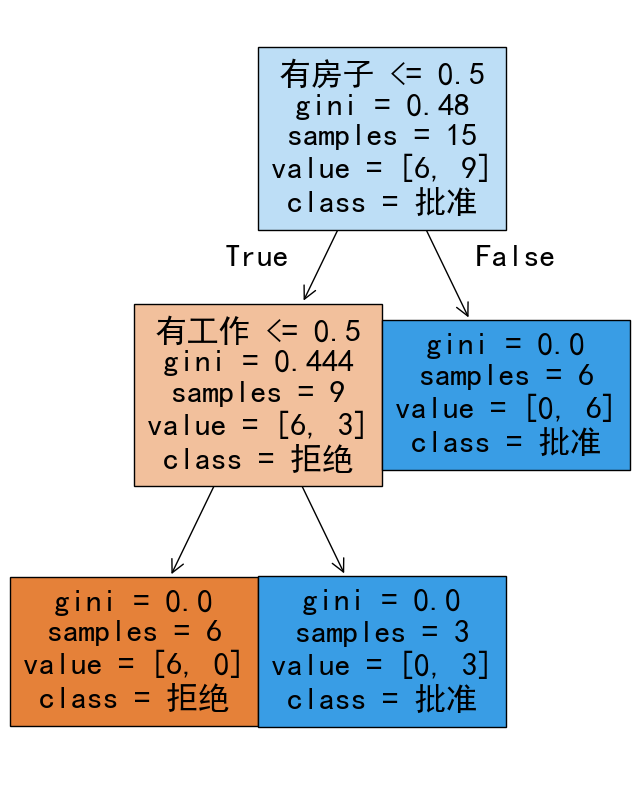

In [23]:
#可视化决策树
plt.figure(figsize=(8,10))
plot_tree(model,filled=True,feature_names=['有房子','有工作','信誉'],class_names=['拒绝','批准'])